In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf

from keras.backend.tensorflow_backend import set_session
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

In [3]:
np.random.seed(7)

In [4]:
dataframe = pandas.read_csv('./data/bitcoin-historical-data.csv.gz', sep='\t')

In [5]:
dataframe.head()

,date,Close
0,2011-12-31,4.58
1,2012-01-01,5.00
2,2012-01-02,5.00
3,2012-01-03,5.29
4,2012-01-04,5.57


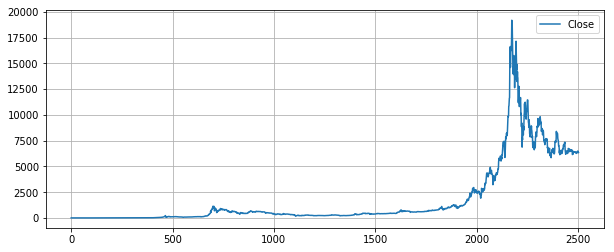

In [6]:
dataframe.plot(figsize=(10,4))
plt.grid()
plt.show()

In [7]:
dataset = dataframe['Close'].values.astype('float32')

In [8]:
max_value = np.max(dataset)

In [9]:
dataset = dataset[len(dataset)/2:]/max_value

In [10]:
train_size = int(len(dataset) * 0.85)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

(1064, 188)


In [11]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [12]:
look_back = 20
trainX, y_train = create_dataset(train, look_back)
testX, y_test = create_dataset(test, look_back)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
history = model.fit(trainX, y_train, epochs=10, batch_size=4, verbose=1, validation_data=(testX, y_test))

Train on 1043 samples, validate on 167 samples
Epoch 1/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0041 - val_loss: 3.7496e-04
Epoch 2/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 3/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0020 - val_loss: 2.8769e-04
Epoch 4/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 3.0120e-04
Epoch 5/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0019 - val_loss: 3.1046e-04
Epoch 6/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 5.1939e-04
Epoch 7/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 7.9891e-04
Epoch 8/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 9.1030e-04
Epoch 9/10
1043/1043 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 3.3162e-04
Epo

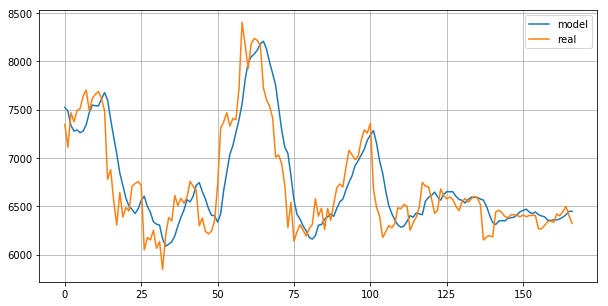

In [16]:
plt.figure(figsize=(10,5))
plt.plot(model.predict(testX)[:,0]*max_value, label='model')
plt.plot(y_test*max_value, label='real')
plt.grid()
plt.legend()
plt.show()